# <p style=" background-color:#DAF7A6;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:20px 20px;"><span  style = "padding : 50px; display : block; "><b >Ansur II ML (Supervised Project)
</b></span></p>  

# About Dataset


The Ansur 2 project is centered around analyzing anthropometric data collected from a diverse population. The dataset, provided by the U.S. Army, contains detailed measurements of various body dimensions, such as height, weight, limb lengths, and circumferences, along with demographic information like age, gender, and ethnicity. 

## Dataset Overview
- **Source**: U.S. Army Anthropometric Survey (ANSUR II)
- **Features**: Over 90 anthropometric variables, including:
  - Stature (Height)
  - Body Weight
  - Chest Circumference
  - Limb Lengths (e.g., arm, leg)
- **Demographic Information**: Includes gender, age, and ethnicity.
- **Size**: Approximately 13,000 participants.

## Project Objective
The primary goal of this project is to:
1. Perform detailed exploratory data analysis (EDA) to uncover patterns and trends in anthropometric measurements.
2. Visualize relationships between body dimensions and demographic factors.
3. Provide insights that can inform ergonomics, product design, and health-related research.

Through this analysis, the project aims to highlight the importance of data-driven design and its impact on human-centric applications.


# EDA

**Retrieve data from the following links and create a data frame**

- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier    
from lightgbm import LGBMClassifier    
from xgboost import XGBClassifier  

In [93]:
df_male = pd.read_csv("ANSUR II MALE Public.csv")

In [94]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [95]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv")

In [96]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [97]:
df_female.columns = df_female.columns.str.lower()

In [98]:
df_male.columns = df_male.columns.str.lower()

In [99]:
for i in df_male.columns:
   print(i)

subjectid
abdominalextensiondepthsitting
acromialheight
acromionradialelength
anklecircumference
axillaheight
balloffootcircumference
balloffootlength
biacromialbreadth
bicepscircumferenceflexed
bicristalbreadth
bideltoidbreadth
bimalleolarbreadth
bitragionchinarc
bitragionsubmandibulararc
bizygomaticbreadth
buttockcircumference
buttockdepth
buttockheight
buttockkneelength
buttockpopliteallength
calfcircumference
cervicaleheight
chestbreadth
chestcircumference
chestdepth
chestheight
crotchheight
crotchlengthomphalion
crotchlengthposterioromphalion
earbreadth
earlength
earprotrusion
elbowrestheight
eyeheightsitting
footbreadthhorizontal
footlength
forearmcenterofgriplength
forearmcircumferenceflexed
forearmforearmbreadth
forearmhandlength
functionalleglength
handbreadth
handcircumference
handlength
headbreadth
headcircumference
headlength
heelanklecircumference
heelbreadth
hipbreadth
hipbreadthsitting
iliocristaleheight
interpupillarybreadth
interscyei
interscyeii
kneeheightmidpatella
k

## Concating df_male and df_female

In [101]:
df = pd.concat([df_male, df_female], ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [102]:
df.gender

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
6063    Female
6064    Female
6065    Female
6066    Female
6067    Female
Name: gender, Length: 6068, dtype: object

## Null values

In [104]:
df.isnull().sum().any()

True

In [105]:
df.isnull().sum()

subjectid                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
dodrace                           0
age                               0
heightin                          0
weightlbs                         0
writingpreference                 0
Length: 108, dtype: int64

In [106]:
for i in df.columns:
    if df[i].isnull().sum() != 0:  # Sütundaki eksik değerleri kontrol ediyor
        print(f"{i} : {df[i].isnull().sum()}")

ethnicity : 4647


In [107]:
df.ethnicity

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
6063    Mexican
6064    Mexican
6065        NaN
6066    Mexican
6067    Mexican
Name: ethnicity, Length: 6068, dtype: object

In [108]:
df.drop("ethnicity", axis = 1, inplace = True)

In [109]:
df.duplicated().sum()

0

In [110]:
df = df[(df["dodrace"] == 1) | (df["dodrace"] == 2) | (df["dodrace"] == 3)]

## Checking Outliers

In [112]:
numeric_df = df.select_dtypes(include="number")

def outliers(df):

    for col in df.select_dtypes(include='number').columns:

        Q1 = df[col].quantile(0.25)

        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        outliers = numeric_df[(numeric_df[col] < (Q1 - 3 * IQR)) | (df[col] > (Q3 + 3 * IQR))]

        

        print(f"{col} - Outliers:")

        print(f"Number of Outliers: {outliers.shape[0]}")

        print(outliers[[col]])  

        print("---------------------------")

In [113]:
outliers(df)

subjectid - Outliers:
Number of Outliers: 1
      subjectid
6067     920103
---------------------------
abdominalextensiondepthsitting - Outliers:
Number of Outliers: 1
    abdominalextensiondepthsitting
55                             451
---------------------------
acromialheight - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [acromialheight]
Index: []
---------------------------
acromionradialelength - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [acromionradialelength]
Index: []
---------------------------
anklecircumference - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [anklecircumference]
Index: []
---------------------------
axillaheight - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [axillaheight]
Index: []
---------------------------
balloffootcircumference - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [balloffootcircumference]
Index: []
---------------------------
balloffootlength - Outliers:
Number of Outliers: 0
E

## Understanding the Features

In [115]:
df.dodrace.value_counts()

dodrace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [116]:
df.subjectnumericrace.value_counts()

subjectnumericrace
1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
231         6
42          6
62          6
35          5
235         4
43          3
63          3
218         3
431         2
2351        2
423         2
2518        2
4251        1
238         1
318         1
451         1
4           1
425         1
428         1
651         1
6           1
631         1
358         1
42351       1
Name: count, dtype: int64

In [117]:
df.dodrace.nunique()

3

In [118]:
df.subjectnumericrace.unique()

array([    1,     2,   351,     3,    61,    28,    21,    31,    23,
           8,   251,    38,    51,    41,    18,    63,    25,   423,
          35,   425,   235,    43,   318,   358,    62,     4,   451,
         238,  4251,   431,  2518,    42,   218,   231,   428,   651,
           6,   631,  2351, 42351], dtype=int64)

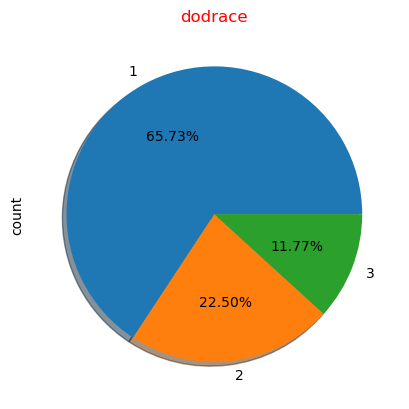

In [119]:
plt.rcParams.update({'font.size': 10})
df['dodrace'].value_counts().plot.pie(#explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('dodrace',color='Red',loc='center');
plt.show()

In [120]:
df["weightlbs"]

0       180
1       160
2       205
3       175
4       213
       ... 
6063    180
6064    150
6065    168
6066    133
6067    132
Name: weightlbs, Length: 5769, dtype: int64

In [121]:
df["weightlbs"].max()

321

In [122]:
df["weightlbs"].min()

0

In [123]:
df[df["weightlbs"] == 0]

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,dodrace,age,heightin,weightlbs,writingpreference
866,13956,241,1462,329,230,1334,248,201,418,404,...,Regular Army,Combat Arms,19Z,Puerto Rico,3,3,41,71,0,Right hand


In [124]:
print(df['weightlbs'].value_counts().sort_index(ascending=True).to_string())

weightlbs
0        1
86       1
88       1
90       1
95       3
96       1
98       1
100      5
101      1
102      2
103      6
104      2
105      8
106      3
107      2
108      5
109      3
110     20
111      4
112      6
113      3
114      8
115     21
116     16
117      8
118     18
119      6
120     49
121      5
122     12
123     12
124     18
125     53
126     14
127     33
128     34
129     11
130    100
131      9
132     25
133     21
134     16
135    117
136     18
137     30
138     43
139     18
140    146
141     18
142     27
143     32
144     17
145    140
146     13
147     33
148     55
149     18
150    216
151      6
152     31
153     41
154     30
155    154
156     31
157     31
158     46
159     12
160    203
161     22
162     35
163     28
164     21
165    194
166     19
167     35
168     53
169     32
170    224
171     19
172     32
173     34
174     35
175    204
176     24
177     26
178     52
179     18
180    219
181     26
182     31


In [125]:
df.drop("heightin", axis =1, inplace= True )

In [126]:
df["weightkg"]

0       815
1       726
2       929
3       794
4       946
       ... 
6063    832
6064    717
6065    762
6066    632
6067    610
Name: weightkg, Length: 5769, dtype: int64

In [127]:
df['stature'] = df['stature'] / 10
df['weightkg'] = df['weightkg'] / 10

**Logistic Regression'da multicollinearity sorununa yol açmamak için aynı bilgiyi taşıyan lbs ve kg gibi sütunlardan birini silmeliyiz. Bu sütunlar arasında tam doğrusal ilişki olduğu için katsayılar kararsız hale gelir, yorumlanabilirlik zorlaşır ve modelin performansı düşebilir. Ayrıca, redundant bilgi modelin gereksiz karmaşık hale gelmesine ve overfitting riskine neden olur. Bu yüzden, biri silinerek model daha sade ve genelleyici hale getirilir.**

In [129]:
df.drop("weightlbs", axis=1, inplace = True)

In [130]:
# Ölçüm birimi ifade eden sütunları seçiyoruz
measurement_columns = [
    'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference',
    'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
    'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth',
    'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
    'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
    'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
    'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion',
    'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
    'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength',
    'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength',
    'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight',
    'interpupillarybreadth', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight',
    'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
    'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight',
    'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength', 'sittingheight',
    'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'stature', 'suprasternaleheight', 'tenthribheight',
    'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight', 'tragiontopofhead',
    'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference',
    'waistdepth', 'waistfrontlengthsitting', 'waistheightomphalion'
]

# 0 değeri olup olmadığını kontrol etmek
zero_values_measurements = df[measurement_columns].eq(0).any()

# Sonuçları yazdırma
print(zero_values_measurements[zero_values_measurements == True])

Series([], dtype: bool)


### Categoric Columns

In [132]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["object", "category", "bool"]]

cat_cols

['gender',
 'date',
 'installation',
 'component',
 'branch',
 'primarymos',
 'subjectsbirthlocation',
 'writingpreference']

In [133]:
def cat_summary(dataframe, col_name):

    print(pd.DataFrame({

        col_name: dataframe[col_name].value_counts(),  # Count of unique values

        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)  # Percentage of each unique value

    }))

    print("------------------------------------------------------------------")



for col in cat_cols:

    cat_summary(df, col)

        gender     Ratio
gender                  
Male      3899  67.58537
Female    1870  32.41463
------------------------------------------------------------------
           date     Ratio
date                     
5-Apr-12     43  0.745363
5-Mar-12     43  0.745363
28-Feb-12    42  0.728029
26-May-11    40  0.693361
21-Feb-12    40  0.693361
...         ...       ...
4-Oct-10      3  0.052002
7-Apr-11      2  0.034668
25-May-11     2  0.034668
7-Sep-11      1  0.017334
16-Nov-10     1  0.017334

[253 rows x 2 columns]
------------------------------------------------------------------
                installation      Ratio
installation                           
Camp Shelby             1111  19.258104
Fort Bliss               925  16.033975
Fort Gordon              636  11.024441
Camp Atterbury           432   7.488300
Fort McCoy               432   7.488300
Fort Hood                416   7.210955
Fort Huachuca            404   7.002947
Fort Bragg               373   6.465592
Fort

In [134]:
pd.DataFrame(df.subjectsbirthlocation.value_counts())

,count
subjectsbirthlocation,
California,417
New York,411
Texas,386
Indiana,264
Florida,210
...,...
Belarus,1
New Zealand,1
South America,1


In [135]:
print(df.subjectsbirthlocation.value_counts().to_string())

subjectsbirthlocation
California                417
New York                  411
Texas                     386
Indiana                   264
Florida                   210
Illinois                  210
Oklahoma                  205
Minnesota                 194
Michigan                  194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
New Jersey                 88
Puerto Rico                88
Missouri                   83
Colorado                   78
Maryland                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota      

In [136]:
def group_by_region(race):
    
    usa_states = [
        "California", "New York", "Texas", "Indiana", "Oklahoma", "Illinois", "Florida", "Minnesota", "Michigan", 
        "Mississippi", "Georgia", "Alabama", "South Carolina", "North Carolina", "Ohio", "Louisiana", "Pennsylvania", 
        "Virginia", "Massachusetts", "Wisconsin", "New Jersey", "Arizona","Missouri","Colorado","Maryland","Tennessee","Kentucky","Washington","Kansas"
        ,"South Dakota", "Iowa", "Arkansas", "Connecticut", "Jamaica", "Nebraska", "Hawaii", "Utah", "West Virginia", "Nevada", "Idaho", "Rhode Island",
        "District of Columbia", "North Dakota","Maine", "Delaware", "New Mexico", "New Hampshire", "Vermont", "Montana", "Alaska", "Wyoming", 
        "US Virgin Islands", "United States"
    ]
    latin_america = [
        "Puerto Rico", "Mexico", "Jamaica", "Dominican Republic", "Colombia", "Haiti", "Panama", "Guam", 
        "Guyana", "Brazil", "Peru", "El Salvador", "Ecuador", "Barbados", "Grenada", "Honduras", "Nicaragua", "Cuba", 
        "Romania", "Liberia", "Portugal", "Bulgaria", "Chile", "Argentina", "Belize", "Costa Rica", "Palau", "Cameroon", 
        "Paraguay", "Venezuela", "Fiji", "Trinidad and Tobago", "Antigua and Barbuda", "Ghana", "Togo", "Ivory Coast", 
        "Guatemala", "Senegal"
    ]
    europe = [
        "Germany", "United Kingdom", "Russia", "France", "Italy", "Poland", "Belgium", "Netherlands", "Romania", 
        "Israel", "Spain", "Denmark"
    ]
    asia = [
        "South Korea", "China", "Japan", "Vietnam", "India", "Nepal", "Taiwan", "Iran", "Sri Lanka", "Korea"
    ]
    africa = [
        "South Africa", "Nigeria", "Liberia", "Kenya", "Ethiopia"
    ]
    
    
    
    if race in usa_states:
        return "USA and States"
    elif race in latin_america:
        return "Latin America and Caribbean"
    elif race in europe:
        return "Europe"
    elif race in asia:
        return "Asia"
    elif race in africa:
        return "Africa"
    else:
        return "Other"


df['subjectsbirthregion'] = df['subjectsbirthlocation'].apply(group_by_region)

df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,dodrace,age,writingpreference,subjectsbirthregion
0,10027,266,1467,337,222,1347,253,202,401,369,...,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,1,41,Right hand,USA and States
1,10032,233,1395,326,220,1293,245,193,394,338,...,Fort Hood,Regular Army,Combat Support,68W,New York,1,1,35,Left hand,USA and States
2,10033,287,1430,341,230,1327,256,196,427,408,...,Fort Hood,Regular Army,Combat Support,68W,New York,2,2,42,Left hand,USA and States
3,10092,234,1347,310,230,1239,262,199,401,359,...,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,1,31,Right hand,USA and States
4,10093,250,1585,372,247,1478,267,224,435,356,...,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,2,21,Right hand,USA and States


In [137]:
df.subjectsbirthregion.value_counts()

subjectsbirthregion
USA and States                 5256
Latin America and Caribbean     269
Europe                          128
Other                            93
Africa                           12
Asia                             11
Name: count, dtype: int64

In [138]:
df.drop("subjectsbirthlocation", axis = 1, inplace = True)

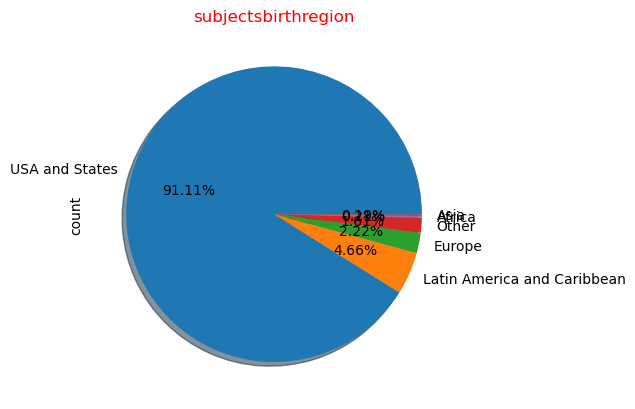

In [139]:
plt.rcParams.update({'font.size': 10})
df['subjectsbirthregion'].value_counts().plot.pie(
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('subjectsbirthregion',color='Red',loc='center');
plt.show()

## Droping Some Useless features

In [141]:
df.drop("subjectnumericrace", axis = 1, inplace = True)
# SubjectNumericRace – Subject Numeric Race; a single or multi-digit codeindicating a subject’s self-reported race or races (verified through interview).

In [142]:
df.drop("date", axis = 1, inplace = True)
# Date – Date the participant was measured, ranging from “04-Oct-10” to “05-Apr-12”

In [143]:
df.drop("installation", axis = 1, inplace = True) 
# Installation – U.S. Army installation where the measurement occurred; e.g. “Fort Hood”, “Camp Shelby”

In [144]:
df.drop("subjectid", axis = 1, inplace = True)
# subjectid – A unique number for each participant measured in the anthropometric survey, ranging from 10027 to 920103, not inclusive

In [145]:
df.drop("primarymos", axis = 1, inplace = True)
# Primary Military Occupational Specialty

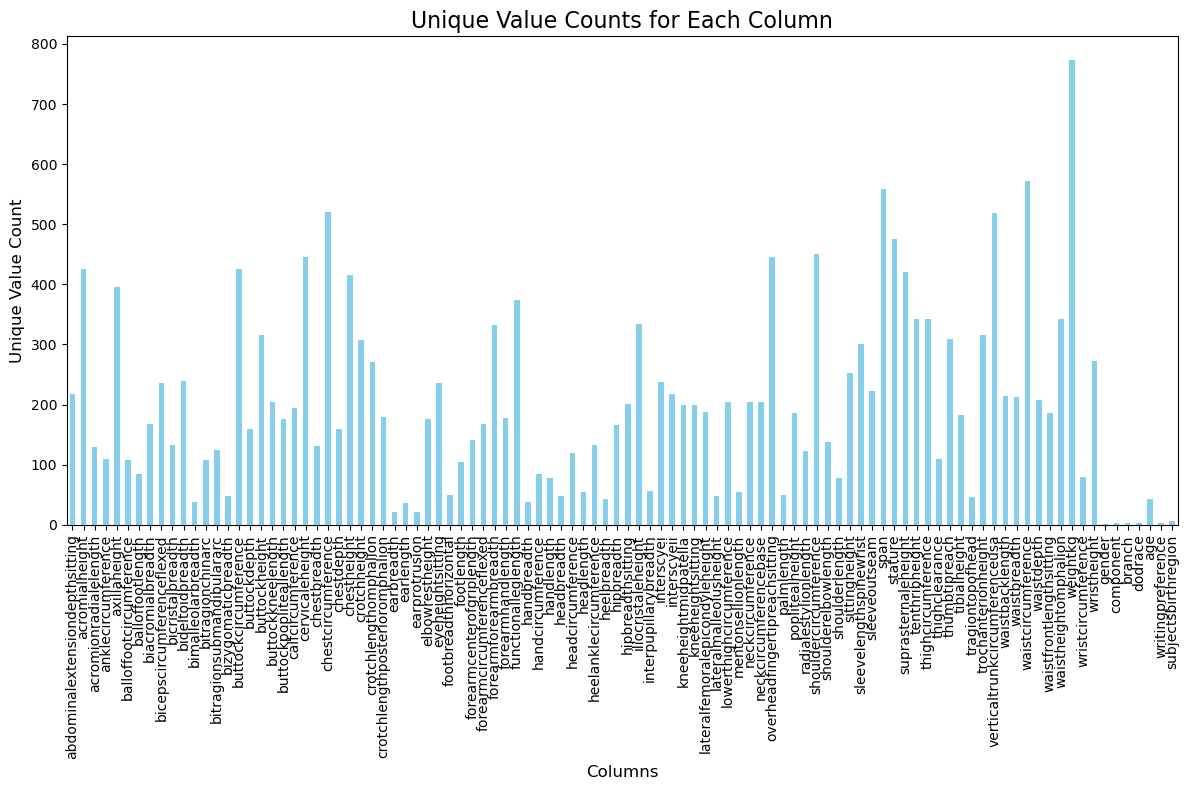

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Benzersiz değer sayısını hesapla
unique_counts = df.nunique()

# Bar grafiği oluştur
plt.figure(figsize=(12, 8))
unique_counts.plot(kind='bar', color='skyblue')
plt.title('Unique Value Counts for Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Unique Value Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

# Grafiği göster
plt.show()

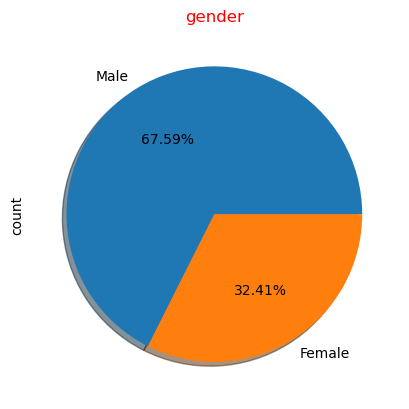

In [147]:
plt.rcParams.update({'font.size': 10})
df['gender'].value_counts().plot.pie(#explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('gender',color='Red',loc='center');
plt.show()

In [148]:
df.dodrace.value_counts()

dodrace
1    3792
2    1298
3     679
Name: count, dtype: int64

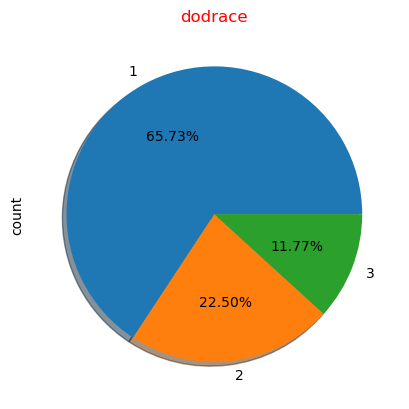

In [149]:
plt.rcParams.update({'font.size': 10})
df['dodrace'].value_counts().plot.pie(#explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('dodrace',color='Red',loc='center');
plt.show()

In [150]:
df[(df["dodrace"] != 1) & (df["dodrace"] != 2) & (df["dodrace"] != 3)]

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,weightkg,wristcircumference,wristheight,gender,component,branch,dodrace,age,writingpreference,subjectsbirthregion


In [151]:
numeric_columns = df.drop("dodrace", axis =1).select_dtypes(include ="number").columns


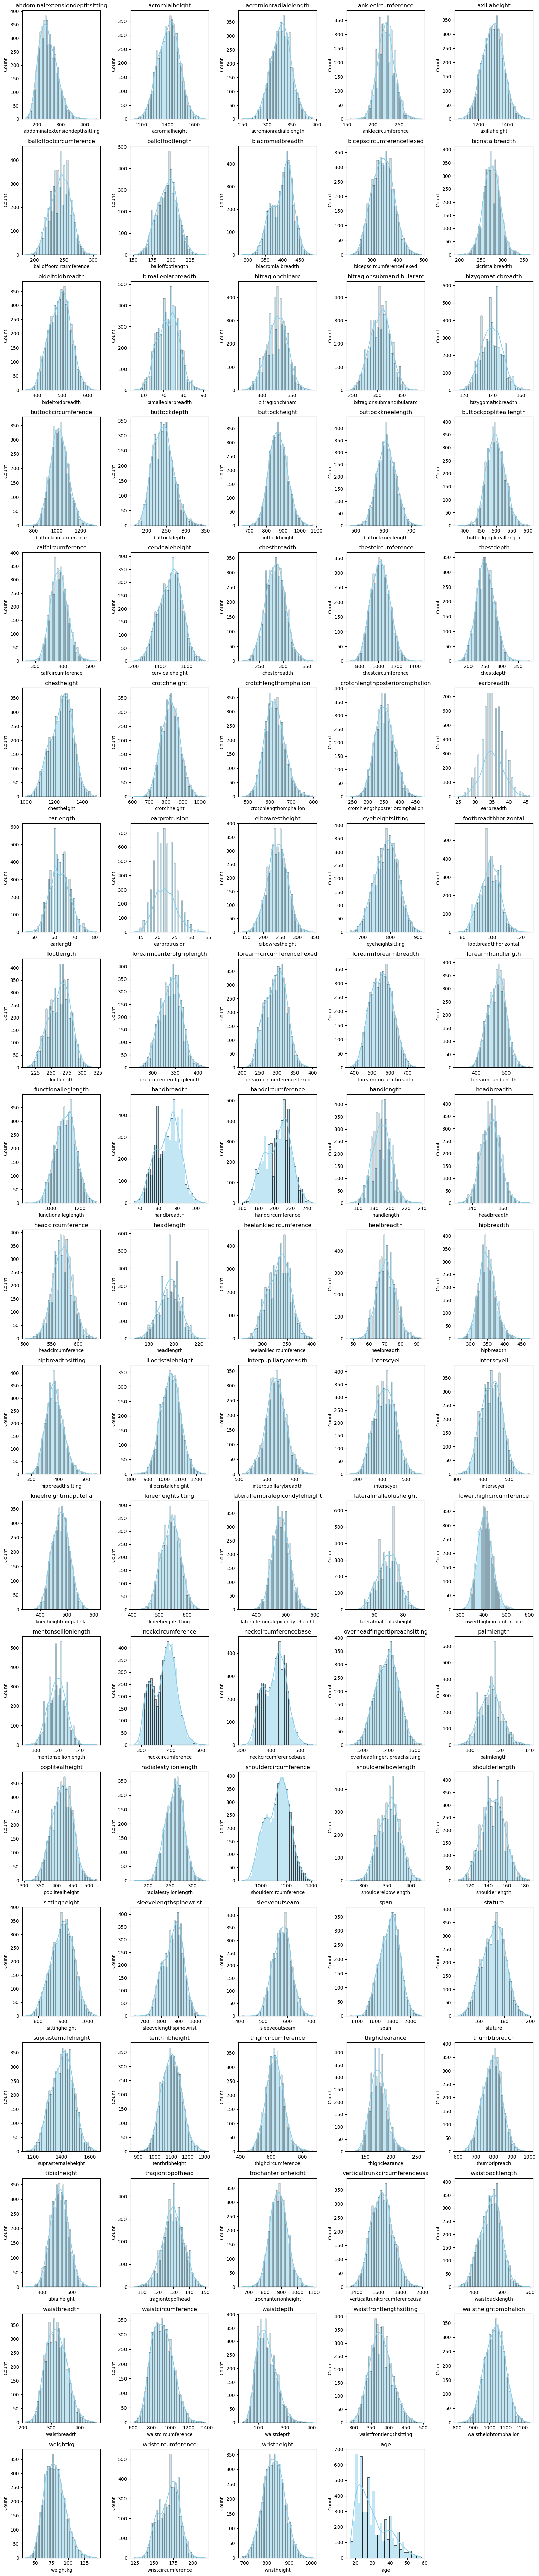

In [152]:
columns = numeric_columns

# Calculate the number of rows based on the specified number of columns
num_columns = 5
num_rows = (len(numeric_columns) // num_columns) + (1 if len(numeric_columns) % num_columns != 0 else 0)

# Create a figure with specified size
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 4 * num_rows))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(column)
    
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

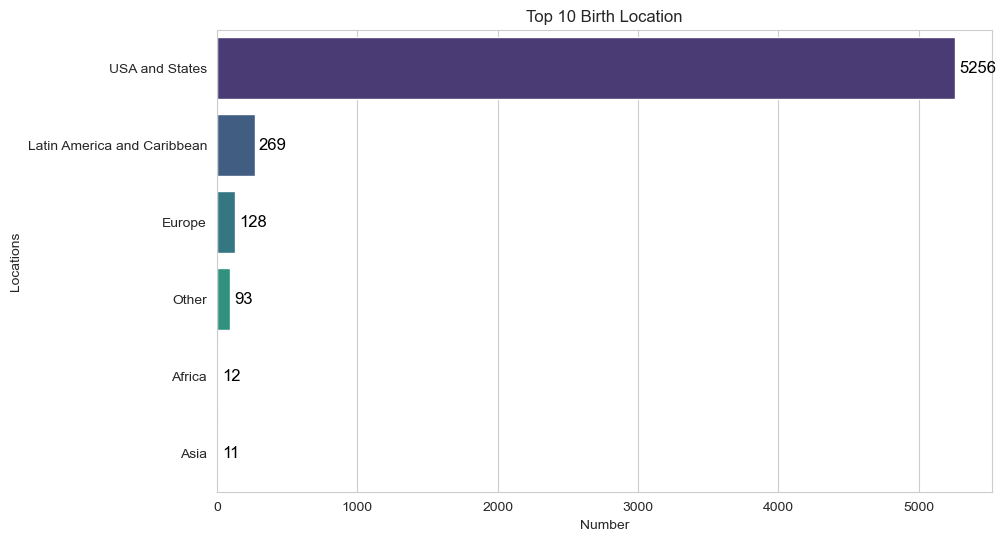

In [153]:
birthlocations = df.subjectsbirthregion.value_counts()

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=birthlocations.values, y=birthlocations.index, palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)
    
ax.set(xlabel='Number', ylabel='Locations')
plt.title('Top 10 Birth Location')
plt.show()

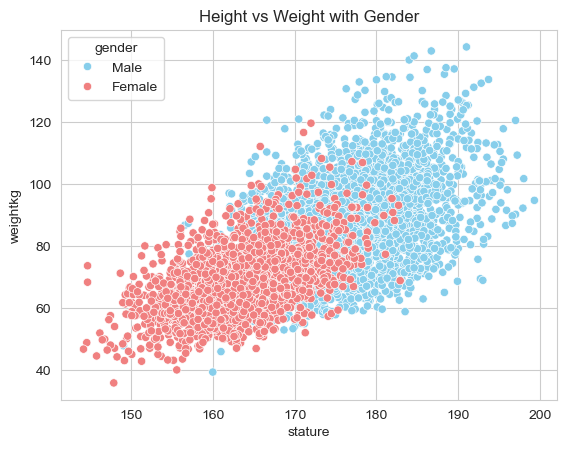

In [154]:
sns.scatterplot(x='stature', y='weightkg', data=df, hue='gender', palette=['skyblue', 'lightcoral'])
plt.title('Height vs Weight with Gender')
plt.show()

In [155]:
df['dodrace'] = df['dodrace'].map({1: 0, 2: 1, 3: 2}) # for some models we shoud start our target from 0 ex: XGBoost

In [156]:
df.dodrace

0       0
1       0
2       1
3       0
4       1
       ..
6063    2
6064    2
6065    1
6066    2
6067    2
Name: dodrace, Length: 5769, dtype: int64

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [158]:
X = df.drop("dodrace", axis = 1)
y = df.dodrace

In [159]:
X.head(2)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,component,branch,age,writingpreference,subjectsbirthregion
0,266,1467,337,222,1347,253,202,401,369,274,...,1054,81.5,175,853,Male,Regular Army,Combat Arms,41,Right hand,USA and States
1,233,1395,326,220,1293,245,193,394,338,257,...,1054,72.6,167,815,Male,Regular Army,Combat Support,35,Left hand,USA and States


In [160]:
y

0       0
1       0
2       1
3       0
4       1
       ..
6063    2
6064    2
6065    1
6066    2
6067    2
Name: dodrace, Length: 5769, dtype: int64

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,stratify=y, random_state=42)

In [162]:
numeric_features = df.drop("dodrace", axis =1).select_dtypes(include ="number").columns
numeric_features

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

In [163]:
cat_features =  df.select_dtypes(include ="object").columns
cat_features

Index(['gender', 'component', 'branch', 'writingpreference',
       'subjectsbirthregion'],
      dtype='object')

In [164]:
column_transformer = make_column_transformer(
    (StandardScaler(), numeric_features),       # For Scaling 
    (OneHotEncoder(), cat_features)     # For Encoding 
)

In [165]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## Logistic model

In [168]:
operations = [ ("transformer",column_transformer), 
              ("logistic",LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]

In [169]:
logistic_vanilla = Pipeline(steps=operations)

In [170]:
logistic_vanilla.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bim...
       'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth',
       'waistfrontlengthsitting', 'waistheightomphalion', 'weightkg',
       'wristcircumference', 'wristheight', 'age'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['gender', 'component', 'branch', 'writingpreference',
       'subjectsbirthregion'],
      dtype='object'))])),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [171]:
eval_metric(logistic_vanilla, X_train, y_train, X_test, y_test)

Test_Set
[[635  19 104]
 [ 13 233  14]
 [ 38   8  90]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       758
           1       0.90      0.90      0.90       260
           2       0.43      0.66      0.52       136

    accuracy                           0.83      1154
   macro avg       0.75      0.80      0.77      1154
weighted avg       0.86      0.83      0.84      1154


Train_Set
[[2581   56  397]
 [  25  966   47]
 [  76   29  438]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3034
           1       0.92      0.93      0.92      1038
           2       0.50      0.81      0.61       543

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



### Logistic Gridsearch

In [173]:
operations = [ ("transformer",column_transformer), 
              ("logistic",LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42))]

In [174]:
logistic_vanilla = Pipeline(steps=operations)

In [175]:
param_grid = {
    'logistic__C': [0.1, 1, 10, 100],  # C değeri genişletildi
    'logistic__penalty': ['l1', 'l2'],  # Hem l1 hem l2 kullanılıyor
    'logistic__solver': ['liblinear', 'lbfgs'],  # Uyumlu solver'lar
    #'logistic__class_weight': [None, 'balanced'],  # Dengesiz veri seti için balanced
    'logistic__max_iter': [200, 500]  # Daha fazla iterasyon denendi
}
  
cv = StratifiedKFold(n_splits = 10)

In [176]:
logistic_grid = GridSearchCV(estimator = logistic_vanilla,
                             param_grid= param_grid,
                             cv = cv,
                             scoring='recall_weighted',
                             n_jobs= -1,
                             refit=True,
                             return_train_score= True).fit(X_train,y_train)

In [177]:
eval_metric(logistic_grid, X_train, y_train, X_test, y_test)

Test_Set
[[698  18  42]
 [ 16 238   6]
 [ 48  11  77]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       758
           1       0.89      0.92      0.90       260
           2       0.62      0.57      0.59       136

    accuracy                           0.88      1154
   macro avg       0.81      0.80      0.80      1154
weighted avg       0.88      0.88      0.88      1154


Train_Set
[[2847   59  128]
 [  48  970   20]
 [ 168   43  332]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3034
           1       0.90      0.93      0.92      1038
           2       0.69      0.61      0.65       543

    accuracy                           0.90      4615
   macro avg       0.84      0.83      0.83      4615
weighted avg       0.90      0.90      0.90      4615



In [178]:
logistic_grid.best_params_

{'logistic__C': 0.1,
 'logistic__max_iter': 200,
 'logistic__penalty': 'l2',
 'logistic__solver': 'liblinear'}

In [179]:
y_pred_test = logistic_grid.predict(X_test)
y_pred_train = logistic_grid.predict(X_train)

logistic_grid_accuracy_test = accuracy_score(y_test, y_pred_test)
logistic_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

logistic_grid_f1_test = f1_score(y_test, y_pred_test, average='macro')
logistic_grid_f1_train = f1_score(y_train, y_pred_train, average='macro')

logistic_grid_accuracy_test, logistic_grid_accuracy_train, logistic_grid_f1_test, logistic_grid_f1_train

(0.8778162911611785,
 0.8990249187432287,
 0.8038950577531456,
 0.8341348524487256)

## SVC

In [181]:
operations = [ ("transformer",column_transformer), 
              ("svc",SVC(class_weight='balanced',max_iter=10000,random_state=42))]

In [182]:
svc_vanilla = Pipeline(steps = operations).fit(X_train,y_train)

In [183]:
eval_metric(svc_vanilla, X_train, y_train, X_test, y_test)

Test_Set
[[638  18 102]
 [  9 237  14]
 [ 38  13  85]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       758
           1       0.88      0.91      0.90       260
           2       0.42      0.62      0.50       136

    accuracy                           0.83      1154
   macro avg       0.75      0.79      0.76      1154
weighted avg       0.86      0.83      0.84      1154


Train_Set
[[2699   41  294]
 [  27  988   23]
 [  57   16  470]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3034
           1       0.95      0.95      0.95      1038
           2       0.60      0.87      0.71       543

    accuracy                           0.90      4615
   macro avg       0.84      0.90      0.86      4615
weighted avg       0.92      0.90      0.91      4615



### SVC GridsearchCV

In [185]:
operations = [ ("transformer",column_transformer), 
              ("svc",SVC(class_weight='balanced',max_iter=10000,random_state=42))]

In [186]:
svc_vanilla = Pipeline(steps = operations)

In [187]:
param_grid = {
    'svc__C': [0.01, 0.1, 0.5, 1],
    'svc__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'svc__gamma': ["scale", "auto", 0.1, 1],
    'svc__degree': [1, 2, 3]
}
#cv = StratifiedKFold(n_splits = 10)

svm_grid = GridSearchCV(svc_vanilla, param_grid, n_jobs=-1)

In [188]:
svm_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',...
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         Index(['gender', 'component', 'branch', 'writingpreference',
       'subjectsbirthregion'],
      dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            max_iter=10000,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 0.5, 1],
                         'svc__degree': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 0.1, 1],
                         'svc__kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [189]:
eval_metric(svm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[679  12  67]
 [ 20 229  11]
 [ 61   9  66]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       758
           1       0.92      0.88      0.90       260
           2       0.46      0.49      0.47       136

    accuracy                           0.84      1154
   macro avg       0.76      0.75      0.75      1154
weighted avg       0.85      0.84      0.85      1154


Train_Set
[[2987   10   37]
 [  10 1028    0]
 [   7    0  536]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3034
           1       0.99      0.99      0.99      1038
           2       0.94      0.99      0.96       543

    accuracy                           0.99      4615
   macro avg       0.97      0.99      0.98      4615
weighted avg       0.99      0.99      0.99      4615



In [190]:
svm_grid.best_params_

{'svc__C': 0.01, 'svc__degree': 3, 'svc__gamma': 0.1, 'svc__kernel': 'poly'}

In [191]:
y_pred_test = svm_grid.predict(X_test)
y_pred_train = svm_grid.predict(X_train)

svm_grid_accuracy_test = accuracy_score(y_test, y_pred_test)
svm_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_grid_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_grid_f1_train = f1_score(y_train, y_pred_train, average='macro')

svm_grid_accuracy_test, svm_grid_accuracy_train, svm_grid_f1_test, svm_grid_f1_train

(0.8440207972270364,
 0.9861321776814734,
 0.7546886475275222,
 0.9801133430214017)

## RF

In [193]:
operations = [ ("transformer",column_transformer), 
              ("RF_model",RandomForestClassifier(class_weight='balanced',random_state=42))]

In [194]:
rf_vanilla = Pipeline(steps= operations).fit(X_train,y_train)

In [195]:
eval_metric(rf_vanilla, X_train, y_train, X_test, y_test)

Test_Set
[[741  10   7]
 [ 78 181   1]
 [ 95   8  33]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       758
           1       0.91      0.70      0.79       260
           2       0.80      0.24      0.37       136

    accuracy                           0.83      1154
   macro avg       0.84      0.64      0.68      1154
weighted avg       0.83      0.83      0.80      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [196]:
y_pred_test = rf_vanilla.predict(X_test)
y_pred_train = rf_vanilla.predict(X_train)

rf_vanilla_accuracy_test = accuracy_score(y_test, y_pred_test)
rf_vanilla_accuracy_train = accuracy_score(y_train, y_pred_train)

rf_vanilla_f1_test = f1_score(y_test, y_pred_test, average='macro')
rf_vanilla_f1_train = f1_score(y_train, y_pred_train, average='macro')

rf_vanilla_accuracy_test, rf_vanilla_accuracy_train, rf_vanilla_f1_test, rf_vanilla_f1_train

(0.8275563258232236, 1.0, 0.6826386720869938, 1.0)

### RF GridSerarchCV

In [198]:
param_grid = {'RF_model__n_estimators':[64, 128, 200],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]}
cv = StratifiedKFold(n_splits = 10)

In [199]:
operations = [ ("transformer",column_transformer), 
              ("RF_model",RandomForestClassifier(class_weight='balanced',random_state=42))]
rf_vanilla = Pipeline(steps= operations)

In [200]:
rf_grid = GridSearchCV(rf_vanilla, param_grid, cv = cv, scoring = "recall_weighted", n_jobs = -1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 486 candidates, totalling 4860 fits


In [201]:
eval_metric(rf_grid, X_train, y_train, X_test, y_test)

Test_Set
[[466  71 221]
 [ 25 194  41]
 [ 39  18  79]]
              precision    recall  f1-score   support

           0       0.88      0.61      0.72       758
           1       0.69      0.75      0.71       260
           2       0.23      0.58      0.33       136

    accuracy                           0.64      1154
   macro avg       0.60      0.65      0.59      1154
weighted avg       0.76      0.64      0.68      1154


Train_Set
[[2032  266  736]
 [ 104  829  105]
 [ 126   36  381]]
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      3034
           1       0.73      0.80      0.76      1038
           2       0.31      0.70      0.43       543

    accuracy                           0.70      4615
   macro avg       0.65      0.72      0.65      4615
weighted avg       0.79      0.70      0.73      4615



In [202]:
rf_grid.best_params_

{'RF_model__max_depth': 4,
 'RF_model__max_features': 'sqrt',
 'RF_model__max_samples': 0.8,
 'RF_model__min_samples_leaf': 3,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 200}

In [203]:
y_pred_test = rf_grid.predict(X_test)
y_pred_train = rf_grid.predict(X_train)

rf_grid_accuracy_test = accuracy_score(y_test, y_pred_test)
rf_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

rf_grid_f1_test = f1_score(y_test, y_pred_test, average='macro')
rf_grid_f1_train = f1_score(y_train, y_pred_train, average='macro')

rf_grid_accuracy_test, rf_grid_accuracy_train, rf_grid_f1_test, rf_grid_f1_train

(0.6403812824956673,
 0.7024918743228602,
 0.5897960615644252,
 0.6545024025407657)

## Boosting Methods

## XGBoost

In [206]:
operations = [ ("transformer",column_transformer), 
              ("xgb_model", XGBClassifier(random_state = 42))]

In [207]:
xgb_vanilla = Pipeline(steps = operations).fit(X_train,y_train)

In [208]:
eval_metric(xgb_vanilla, X_train, y_train, X_test, y_test)

Test_Set
[[730  15  13]
 [ 31 223   6]
 [ 73   9  54]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       758
           1       0.90      0.86      0.88       260
           2       0.74      0.40      0.52       136

    accuracy                           0.87      1154
   macro avg       0.84      0.74      0.77      1154
weighted avg       0.87      0.87      0.86      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost GridSearchCV

In [210]:
param_grid = {"xgb_model__n_estimators":[100, 300],
              'xgb_model__max_depth':[3,5,6],
              "xgb_model__learning_rate": [0.1, 0.3],
              "xgb_model__subsample":[0.5, 1],
              "xgb_model__colsample_bytree":[0.5, 1]}

In [211]:
operations = [ ("transformer",column_transformer), 
              ("xgb_model", XGBClassifier())]
xgb_vanilla = Pipeline(steps = operations)

In [212]:
xgb_grid_model = GridSearchCV(xgb_vanilla, param_grid=param_grid, cv=cv, scoring="f1_weighted", n_jobs=-1, refit=True, verbose=2).fit(X_train, y_train)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [213]:
eval_metric(xgb_grid_model,X_train, y_train, X_test, y_test) 

Test_Set
[[728  11  19]
 [ 23 231   6]
 [ 73  11  52]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       758
           1       0.91      0.89      0.90       260
           2       0.68      0.38      0.49       136

    accuracy                           0.88      1154
   macro avg       0.82      0.74      0.77      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [214]:
xgb_grid_model.best_params_

{'xgb_model__colsample_bytree': 1,
 'xgb_model__learning_rate': 0.3,
 'xgb_model__max_depth': 5,
 'xgb_model__n_estimators': 300,
 'xgb_model__subsample': 0.5}

In [215]:
y_pred_test = xgb_grid_model.predict(X_test)
y_pred_train = xgb_grid_model.predict(X_train)

xgb_grid_model_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_grid_model_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_grid_model_f1_test = f1_score(y_test, y_pred_test, average='macro')
xgb_grid_model_f1_train = f1_score(y_train, y_pred_train, average='macro')

xgb_grid_model_accuracy_test, xgb_grid_model_accuracy_train, xgb_grid_model_f1_test, xgb_grid_model_f1_train

(0.8760831889081456, 1.0, 0.7697338961402148, 1.0)

## AdaBoost

In [217]:
operations = [ ("transformer",column_transformer), 
              ("ada_model", AdaBoostClassifier(random_state=42))]
ada_vanilla = Pipeline(steps = operations).fit(X_train, y_train)

In [218]:
eval_metric(ada_vanilla, X_train, y_train, X_test, y_test)

Test_Set
[[718  23  17]
 [ 51 202   7]
 [ 79  14  43]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.89       758
           1       0.85      0.78      0.81       260
           2       0.64      0.32      0.42       136

    accuracy                           0.83      1154
   macro avg       0.78      0.68      0.71      1154
weighted avg       0.82      0.83      0.82      1154


Train_Set
[[2901   86   47]
 [ 181  837   20]
 [ 323   46  174]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3034
           1       0.86      0.81      0.83      1038
           2       0.72      0.32      0.44       543

    accuracy                           0.85      4615
   macro avg       0.81      0.69      0.73      4615
weighted avg       0.84      0.85      0.83      4615



### ADABoost GridSearchCV

In [220]:
operations = [ ("transformer",column_transformer), 
              ("ada_model", AdaBoostClassifier(random_state=42))]
ada_vanilla = Pipeline(steps = operations)

In [221]:
param_grid = {
    "ada_model__n_estimators": [50, 100, 200],
    "ada_model__learning_rate": [0.01, 0.1, 0.5, 1]
}
cv = StratifiedKFold(n_splits = 10)

In [222]:
ada_grid = GridSearchCV(ada_vanilla, param_grid, cv=cv, scoring= "recall_weighted")

In [223]:
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'bi...
       'wristcircumference', 'wristheight', 'age'],
      dtype='object')),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         Index(['gender', 'component', 'branch', 'writingpreference',
       'subjectsbirthregion'],
      dtype='object'))])),
                                       ('ada_model',
                                        AdaBoostClassifier(random_state=42))]),
             param_grid={'ada_model__learning_rate': [0.01, 0.1, 0.5, 1],
                         'ada_model__n_estimators': [50, 100, 200]},
             scoring='recall_weighted')

In [224]:
eval_metric(ada_grid, X_train, y_train, X_test, y_test)

Test_Set
[[730  13  15]
 [ 35 218   7]
 [ 77  10  49]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       758
           1       0.90      0.84      0.87       260
           2       0.69      0.36      0.47       136

    accuracy                           0.86      1154
   macro avg       0.82      0.72      0.75      1154
weighted avg       0.85      0.86      0.85      1154


Train_Set
[[2963   42   29]
 [ 136  882   20]
 [ 317   26  200]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3034
           1       0.93      0.85      0.89      1038
           2       0.80      0.37      0.51       543

    accuracy                           0.88      4615
   macro avg       0.87      0.73      0.77      4615
weighted avg       0.87      0.88      0.86      4615



In [225]:
ada_grid.best_params_

{'ada_model__learning_rate': 0.5, 'ada_model__n_estimators': 200}

In [226]:
y_pred_test = ada_grid.predict(X_test)
y_pred_train = ada_grid.predict(X_train)

ada_grid_accuracy_test = accuracy_score(y_test, y_pred_test)
ada_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

ada_grid_f1_test = f1_score(y_test, y_pred_test, average='macro')
ada_grid_f1_train = f1_score(y_train, y_pred_train, average='macro')

ada_grid_accuracy_test, ada_grid_accuracy_train, ada_grid_f1_test, ada_grid_f1_train

(0.8639514731369151,
 0.8764897074756229,
 0.7520631442429151,
 0.7703780462116526)

## GradientBoosting

In [228]:
operations = [ ("transformer",column_transformer), 
              ("grad_model", GradientBoostingClassifier(random_state=42))]
grad_vanilla = Pipeline(steps = operations).fit(X_train, y_train)

In [229]:
eval_metric(grad_vanilla, X_train, y_train, X_test, y_test)

Test_Set
[[730  17  11]
 [ 33 218   9]
 [ 76   8  52]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       758
           1       0.90      0.84      0.87       260
           2       0.72      0.38      0.50       136

    accuracy                           0.87      1154
   macro avg       0.83      0.73      0.76      1154
weighted avg       0.86      0.87      0.85      1154


Train_Set
[[3010   13   11]
 [  81  948    9]
 [ 241   18  284]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      3034
           1       0.97      0.91      0.94      1038
           2       0.93      0.52      0.67       543

    accuracy                           0.92      4615
   macro avg       0.94      0.81      0.85      4615
weighted avg       0.92      0.92      0.91      4615



### GradientBoosting GridsearchCV

In [231]:
operations = [ ("transformer",column_transformer), 
              ("grad_model", GradientBoostingClassifier(random_state=42))]
grad_vanilla = Pipeline(steps = operations)

In [232]:
param_grid = {
    "grad_model__subsample": [0.5, 0.8],
    "grad_model__max_features": [None, 2, 3],
    "grad_model__learning_rate": [0.1, 0.5],
    'grad_model__max_depth': [3, 5]
}

cv = StratifiedKFold(n_splits = 10)

In [233]:
grad_grid = GridSearchCV(grad_vanilla, param_grid, scoring= "recall_weighted")

In [234]:
grad_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',...
                                                                         OneHotEncoder(),
                                                                         Index(['gender', 'component', 'branch', 'writingpreference',
       'subjectsbirthregion'],
      dtype='object'))])),
                                       ('grad_model',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'grad_model__learning_rate': [0.1, 0.5],
                         'grad_model__max_depth': [3, 5],
                         'grad_model__max_features': [None, 2, 3],
                         'grad_model__subsample': [0.5, 0.8]},
             scoring='recall_weighted')

In [235]:
eval_metric(grad_grid, X_train, y_train, X_test, y_test)

Test_Set
[[721  19  18]
 [ 24 228   8]
 [ 75   6  55]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       758
           1       0.90      0.88      0.89       260
           2       0.68      0.40      0.51       136

    accuracy                           0.87      1154
   macro avg       0.82      0.74      0.77      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[3034    0    0]
 [   2 1036    0]
 [  26    0  517]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      0.95      0.98       543

    accuracy                           0.99      4615
   macro avg       1.00      0.98      0.99      4615
weighted avg       0.99      0.99      0.99      4615



In [236]:
grad_grid.best_params_

{'grad_model__learning_rate': 0.1,
 'grad_model__max_depth': 5,
 'grad_model__max_features': None,
 'grad_model__subsample': 0.8}

In [237]:
y_pred_test = grad_grid.predict(X_test)
y_pred_train = grad_grid.predict(X_train)

grad_grid_accuracy_test = accuracy_score(y_test, y_pred_test)
grad_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

grad_grid_f1_test = f1_score(y_test, y_pred_test, average='macro')
grad_grid_f1_train = f1_score(y_train, y_pred_train, average='macro')

grad_grid_accuracy_test, grad_grid_accuracy_train, grad_grid_f1_test, grad_grid_f1_train

(0.8700173310225303, 0.9939328277356446, 0.7698720956417509, 0.989971400701966)

## LightGBM

In [239]:
operations = [ ("transformer",column_transformer), 
              ("light_model", LGBMClassifier(random_state=42))]
light_vanilla = Pipeline(steps = operations).fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14863
[LightGBM] [Info] Number of data points in the train set: 4615, number of used features: 109
[LightGBM] [Info] Start training from score -0.419430
[LightGBM] [Info] Start training from score -1.492016
[LightGBM] [Info] Start training from score -2.139958


In [240]:
eval_metric(light_vanilla, X_train, y_train, X_test, y_test)

Test_Set
[[725  15  18]
 [ 25 228   7]
 [ 76  11  49]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       758
           1       0.90      0.88      0.89       260
           2       0.66      0.36      0.47       136

    accuracy                           0.87      1154
   macro avg       0.81      0.73      0.76      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### LightGBM GridSearchCV

In [242]:
param_grid = {
    'LGBM_model__learning_rate': [0.01,  0.1],
    'LGBM_model__n_estimators': [100, 200],
    'LGBM_model__max_depth': [3, 5],
    "LGBM_model__num_leaves": [8, 32],  
    'LGBM_model__subsample': [0.8, 1.0],
    'LGBM_model__colsample_bytree': [0.8, 0.9]
}

In [243]:
operations = [ ("transformer",column_transformer), 
              ("LGBM_model", LGBMClassifier(random_state=42))]
light_vanilla = Pipeline(steps = operations)

In [244]:
light_grid = GridSearchCV(estimator=light_vanilla,
                          param_grid=param_grid,
                          scoring='recall_weighted',
                         # cv=5,
                          n_jobs = -1,
                          return_train_score=True).fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14863
[LightGBM] [Info] Number of data points in the train set: 4615, number of used features: 109
[LightGBM] [Info] Start training from score -0.419430
[LightGBM] [Info] Start training from score -1.492016
[LightGBM] [Info] Start training from score -2.139958
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [245]:
eval_metric(light_grid, X_train, y_train, X_test, y_test)

Test_Set
[[732  12  14]
 [ 27 225   8]
 [ 73  12  51]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       758
           1       0.90      0.87      0.88       260
           2       0.70      0.38      0.49       136

    accuracy                           0.87      1154
   macro avg       0.83      0.74      0.76      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [246]:
light_grid.best_params_

{'LGBM_model__colsample_bytree': 0.8,
 'LGBM_model__learning_rate': 0.1,
 'LGBM_model__max_depth': 5,
 'LGBM_model__n_estimators': 200,
 'LGBM_model__num_leaves': 32,
 'LGBM_model__subsample': 0.8}

In [247]:
y_pred_test = light_grid.predict(X_test)
y_pred_train = light_grid.predict(X_train)

light_grid_accuracy_test = accuracy_score(y_test, y_pred_test)
light_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

light_grid_f1_test = f1_score(y_test, y_pred_test, average='macro')
light_grid_f1_train = f1_score(y_train, y_pred_train, average='macro')

light_grid_accuracy_test, light_grid_accuracy_train, light_grid_f1_test, light_grid_f1_train

(0.8734835355285961, 1.0, 0.7642931461669842, 1.0)

## Comparing Models

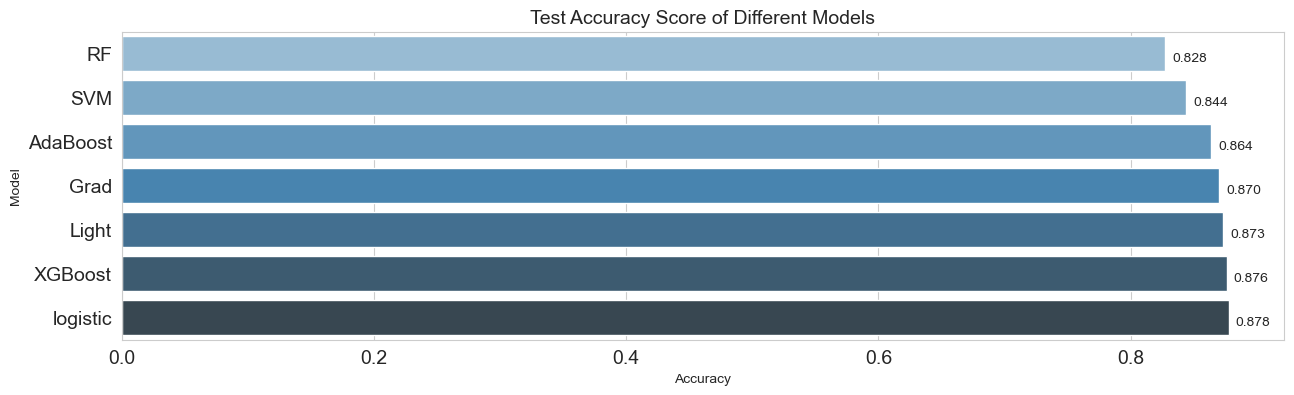

In [249]:
compare = pd.DataFrame({"Model": ["logistic", "SVM","RF","XGBoost","AdaBoost","Grad","Light"],
                        "Accuracy": [logistic_grid_accuracy_test, svm_grid_accuracy_test, rf_vanilla_accuracy_test,xgb_grid_model_accuracy_test,ada_grid_accuracy_test,grad_grid_accuracy_test,light_grid_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15,4))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14);

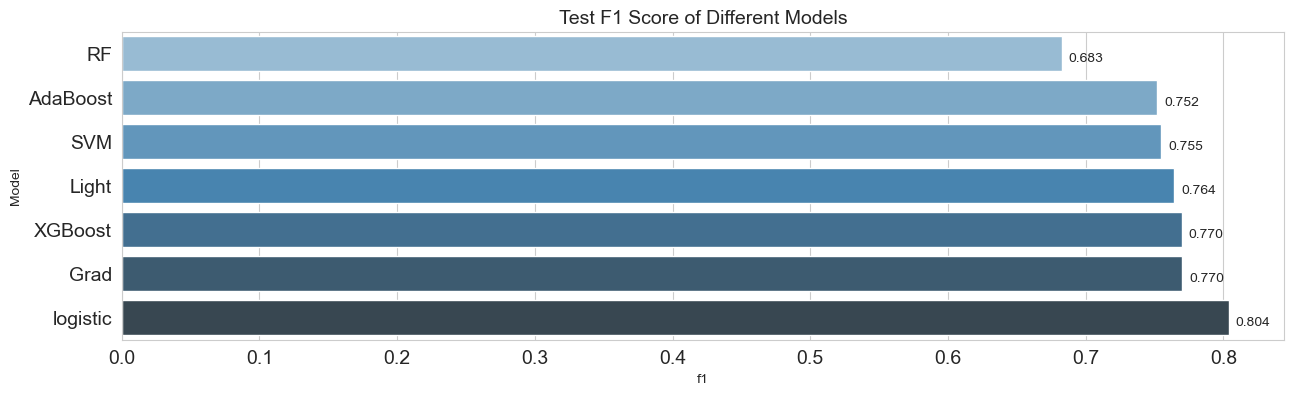

In [250]:
compare = pd.DataFrame({"Model": ["logistic", "SVM","RF","XGBoost","AdaBoost","Grad","Light"],
                        "f1": [logistic_grid_f1_test, svm_grid_f1_test, rf_vanilla_f1_test,xgb_grid_model_f1_test,ada_grid_f1_test,grad_grid_f1_test,light_grid_f1_test]})

compare = compare.sort_values(by="f1", ascending=True)

plt.figure(figsize=(15,4))
ax = sns.barplot(x="f1", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Score of Different Models", size=14);

# Feature Importance

In [457]:
operations = [
    ("transformer", column_transformer),  
    ("xgb_model", XGBClassifier(
        colsample_bytree=1,
        learning_rate=0.3,
        max_depth=5,
        n_estimators=200,
        subsample=0.5,
        random_state=42  
    ))
]


f_i = Pipeline(steps=operations).fit(X_train, y_train)

In [459]:
f_i["xgb_model"].feature_importances_

array([0.00616308, 0.00802408, 0.00826451, 0.00919224, 0.00850213,
       0.00704844, 0.00607576, 0.00573326, 0.00823759, 0.01741899,
       0.00769835, 0.00787612, 0.01631196, 0.00709859, 0.0085835 ,
       0.00681223, 0.00660835, 0.009442  , 0.01472381, 0.01416833,
       0.00647556, 0.00731128, 0.00908336, 0.00779359, 0.00520754,
       0.00598159, 0.00901322, 0.00500909, 0.00491793, 0.00534073,
       0.01301366, 0.01139568, 0.02596804, 0.02380478, 0.00634609,
       0.0055291 , 0.01173341, 0.00772376, 0.00712651, 0.01500392,
       0.00553608, 0.00686896, 0.00853876, 0.01275885, 0.00601947,
       0.01031911, 0.00951644, 0.0065389 , 0.02459597, 0.0068222 ,
       0.00523592, 0.00607429, 0.02504067, 0.00512526, 0.00484294,
       0.00522758, 0.00552748, 0.00464512, 0.00969531, 0.00628059,
       0.00752521, 0.00737059, 0.00543084, 0.00596581, 0.01148493,
       0.0039251 , 0.01527428, 0.00672589, 0.00797043, 0.0040828 ,
       0.03276442, 0.0069788 , 0.00526235, 0.00760397, 0.00601

In [463]:
f_i["transformer"].get_feature_names_out()

array(['standardscaler__abdominalextensiondepthsitting',
       'standardscaler__acromialheight',
       'standardscaler__acromionradialelength',
       'standardscaler__anklecircumference',
       'standardscaler__axillaheight',
       'standardscaler__balloffootcircumference',
       'standardscaler__balloffootlength',
       'standardscaler__biacromialbreadth',
       'standardscaler__bicepscircumferenceflexed',
       'standardscaler__bicristalbreadth',
       'standardscaler__bideltoidbreadth',
       'standardscaler__bimalleolarbreadth',
       'standardscaler__bitragionchinarc',
       'standardscaler__bitragionsubmandibulararc',
       'standardscaler__bizygomaticbreadth',
       'standardscaler__buttockcircumference',
       'standardscaler__buttockdepth', 'standardscaler__buttockheight',
       'standardscaler__buttockkneelength',
       'standardscaler__buttockpopliteallength',
       'standardscaler__calfcircumference',
       'standardscaler__cervicaleheight', 'standardsca

In [465]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

In [469]:
xgb_model = f_i.named_steps["xgb_model"]  # Correct way to access pipeline steps
feature_importances = xgb_model.feature_importances_  # Get feature importances

In [481]:
imp_feats = pd.DataFrame(data=f_i["xgb_model"].feature_importances_, columns=['xgb_Importance'])
xgb_imp_feats = imp_feats.sort_values('xgb_Importance', ascending=False)
xgb_imp_feats

,xgb_Importance
108,0.050273
94,0.036581
70,0.032764
32,0.025968
52,0.025041
...,...
95,0.000000
102,0.000000
105,0.000000
106,0.000000


In [485]:
top_10_feats = xgb_imp_feats.sort_values("xgb_Importance", ascending=False).head(10)

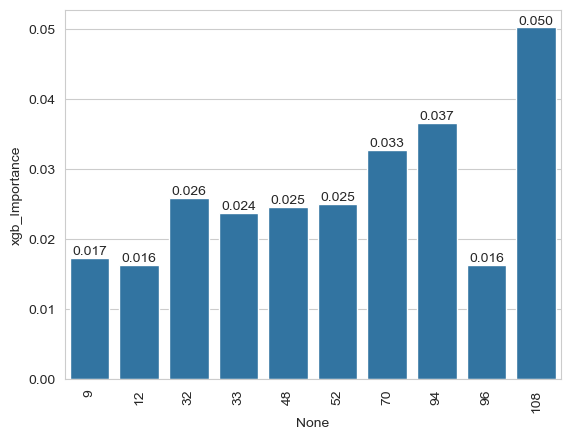

In [487]:
ax = sns.barplot(data=top_10_feats, x=top_10_feats.index, y='xgb_Importance')

ax.bar_label(ax.containers[0], fmt="%.3f")

plt.xticks(rotation=90)

plt.show()

In [493]:
b_10_feats = xgb_imp_feats.sort_values("xgb_Importance", ascending=True).head(10)

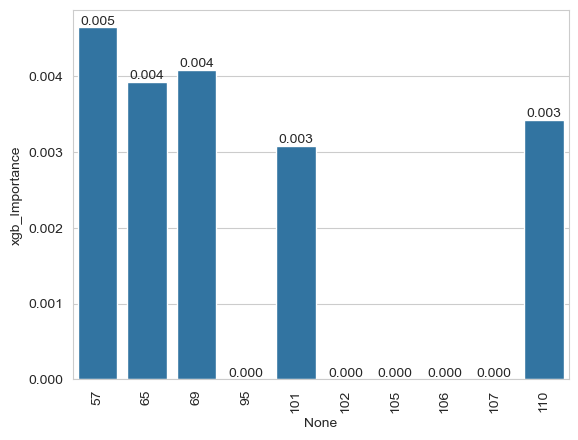

In [495]:
ax = sns.barplot(data=b_10_feats, x=b_10_feats.index, y='xgb_Importance')

ax.bar_label(ax.containers[0], fmt="%.3f")

plt.xticks(rotation=90)

plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [252]:
operations = [
    ("transformer", column_transformer),  
    ("xgb_model", XGBClassifier(
        colsample_bytree=1,
        learning_rate=0.3,
        max_depth=5,
        n_estimators=200,
        subsample=0.5,
        random_state=42  
    ))
]


final_model = Pipeline(steps=operations).fit(X, y)


In [253]:
import pickle

In [254]:
pickle.dump(final_model, open("final_model", "wb"))

In [255]:
new_model = pickle.load(open("final_model", "rb"))

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

**SMOTE (Synthetic Minority Over-sampling Technique)**

**Kullanım Amacı:**

SMOTE, dengesiz veri setlerini dengelemek için kullanılan bir örnekleme tekniğidir. Dengesiz veri setleri, bir sınıfın diğer sınıflardan çok daha fazla örneğe sahip olduğu durumları ifade eder. Bu tür veri setlerinde, azınlık sınıfı (daha az örneği olan sınıf) genellikle göz ardı edilir ve model, çoğunluk sınıfını tahmin etmekte daha başarılı olur. SMOTE, azınlık sınıfından yeni "sentetik" örnekler üreterek bu dengesizliği gidermeye çalışır.

**Kullanım Yerleri:**

- **Kredi Riski Değerlendirmesi**: Dolandırıcılık durumları genellikle dengesizdir; yani, çoğu işlem yasal olup, sadece birkaçı dolandırıcılıktır.
- **Tıbbi Tanı**: Örneğin, bir hastalık nadir görülüyorsa, sağlıklı ve hasta örnekleri arasında dengesizlik olacaktır.
- **Müşteri Terk Analizi**: Çoğu müşteri hizmeti kullanmaya devam ederken, sadece birkaçı hizmeti bırakır.
- **Anomali Tespiti**: Normal durumlar genellikle daha sık görülürken, anomaliler (örneğin, güvenlik ihlalleri) nadirdir.

**Unbalanced Datalar için Önemi:**

Dengesiz veri setleri, sınıflandırma modellerinin performansını olumsuz etkileyebilir. Model, çoğunluk sınıfını tahmin etmekte iyi olabilir, ancak azınlık sınıfını genellikle göz ardı eder. Bu, özellikle azınlık sınıfı daha önemliyse (örneğin, dolandırıcılık tespiti, nadir hastalıkların teşhisi) problem olabilir. SMOTE, bu tür problemleri mitigasyon (hafifletme) amacıyla kullanılır.

**Nasıl Çalışır?**

1. Azınlık sınıfından rastgele bir örnek seçilir.
2. Bu örneğin k en yakın komşusu hesaplanır.
3. Rastgele seçilen k en yakın komşulardan biri seçilir.
4. Rastgele bir interpolasyon faktörü* üretilir.
5. Bu faktör kullanılarak yeni bir "sentetik" örnek oluşturulur.

**Kullanımı:**

Python'da, SMOTE genellikle imbalanced-learn kütüphanesi ile kullanılır.

*Interpolasyon faktörü, SMOTE algoritmasında yeni "sentetik" örnekler oluştururken kullanılan bir ağırlık faktörüdür. Temel fikir, azınlık sınıfından seçilen bir örnekle onun k en yakın komşuları arasında yeni bir örnek oluşturmaktır. Interpolasyon faktörü, bu iki örnek arasında ne kadar "yakın" olacağını belirler. SMOTE algoritmasının esnekliğini artırır ve azınlık sınıfının örneklerini daha geniş bir alana yayarak modelin genelleme yeteneğini iyileştirmeye yardımcı olur.

In [258]:
from imblearn.over_sampling import SMOTE

In [259]:
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [260]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

print("Before SMOTE:")
print(pd.Series(y_train).value_counts())

print("\nAfter SMOTE :")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
dodrace
0    3034
1    1038
2     543
Name: count, dtype: int64

After SMOTE :
dodrace
0    3034
1    3034
2    3034
Name: count, dtype: int64


In [261]:
model = XGBClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [262]:
eval_metric(model, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

Test_Set
[[722  14  22]
 [ 27 227   6]
 [ 64  11  61]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       758
           1       0.90      0.87      0.89       260
           2       0.69      0.45      0.54       136

    accuracy                           0.88      1154
   macro avg       0.82      0.76      0.78      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[3034    0    0]
 [   0 3034    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      9102
   macro avg       1.00      1.00      1.00      9102
weighted avg       1.00      1.00      1.00      9102



## Smote XGBoost GridsearchCV

In [264]:
param_grid = {"xgb_model__n_estimators":[100, 300],
              'xgb_model__max_depth':[2,3,6],
              "xgb_model__learning_rate": [0.01,0.1, 0.3],
              "xgb_model__subsample":[0.5, 1],
              "xgb_model__colsample_bytree":[0.5, 1]}

In [265]:
model_1 = XGBClassifier(random_state=42)

In [266]:
xgb_grid_smote_model = GridSearchCV(model_1, param_grid=param_grid, cv= 10, scoring="f1", n_jobs=-1, refit=True, verbose=2).fit(X_train_resampled, y_train_resampled)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [267]:
xgb_grid_smote_model.best_params_

{'xgb_model__colsample_bytree': 0.5,
 'xgb_model__learning_rate': 0.01,
 'xgb_model__max_depth': 2,
 'xgb_model__n_estimators': 100,
 'xgb_model__subsample': 0.5}

In [268]:
eval_metric(xgb_grid_smote_model, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

Test_Set
[[722  14  22]
 [ 27 227   6]
 [ 64  11  61]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       758
           1       0.90      0.87      0.89       260
           2       0.69      0.45      0.54       136

    accuracy                           0.88      1154
   macro avg       0.82      0.76      0.78      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[3034    0    0]
 [   0 3034    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      9102
   macro avg       1.00      1.00      1.00      9102
weighted avg       1.00      1.00      1.00      9102



In [269]:
y_pred_test = xgb_grid_smote_model.predict(X_test_transformed)
y_pred_train = xgb_grid_smote_model.predict(X_train_resampled)

xgb_grid_smote_model_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_grid_smote_model_accuracy_train = accuracy_score(y_train_resampled, y_pred_train)

xgb_grid_smote_model_f1_test = f1_score(y_test, y_pred_test, average='macro')
xgb_grid_smote_model_f1_train = f1_score(y_train_resampled, y_pred_train, average='macro')

xgb_grid_smote_model_accuracy_test, xgb_grid_smote_model_accuracy_train, xgb_grid_smote_model_f1_test, xgb_grid_smote_model_f1_train

(0.8752166377816292, 1.0, 0.7827002476896056, 1.0)

#  SHAP

In [273]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [274]:
import shap

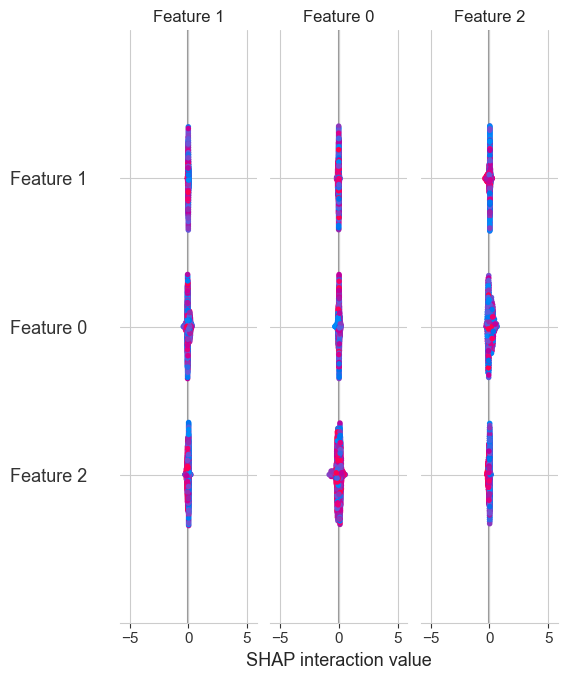

In [275]:
from sklearn.pipeline import Pipeline
import shap
from xgboost import XGBClassifier

# Operations
operations = [
    ("transformer", column_transformer), 
    ("xgb_model", XGBClassifier(random_state=42))
]


xgb_vanilla = Pipeline(steps=operations).fit(X_train, y_train)


X_test_transformed = xgb_vanilla.named_steps['transformer'].transform(X_test)


explainer = shap.TreeExplainer(xgb_vanilla.named_steps['xgb_model'])  
shap_values = explainer.shap_values(X_test_transformed) 


if isinstance(shap_values, list):  
    shap.summary_plot(shap_values[1], X_test_transformed)  
else:
    shap.summary_plot(shap_values, X_test_transformed)



# <p style=" background-color:#DAF7A6;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:20px 20px;"><span  style = "padding : 50px; display : block; "><b >Thank You
</b></span></p>  